In [1015]:
#Importing Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1017]:
train_df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [1018]:
test_df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [1019]:
#Dimension of dataset
print(train_df.shape)
print(test_df.shape)

(8523, 12)
(5681, 11)


In [1020]:
print(train_df.columns)

print(test_df.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [1021]:
#Datatype attributes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [1022]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [1023]:
#Statistical information
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [1024]:
test_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [1025]:
#check unique values in dataset
train_df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [1027]:
#checking for missing values
train_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [1028]:
test_df.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [1029]:
#concatenate the test and train dataset and giving variable name as df
train_df['source']='train'
test_df['source']='test'
df=pd.concat([train_df,test_df],ignore_index=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [1031]:
df.isna().sum() # checking the total null values

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [1032]:
df.shape

(14204, 13)

In [1033]:
#checking for categorical attributes
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'source']

In [1034]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'source']

In [954]:
#print the categorical columns
for col in cat_col:
    print(col)
    print(train_df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

### Analysis with the help of graph

In [1035]:
sns.set()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


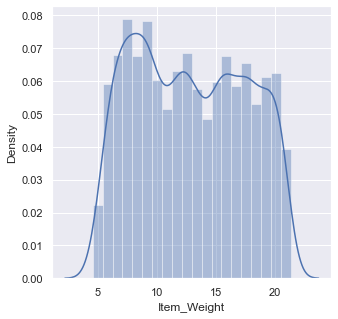

In [1036]:
#distribution plot for Item weight
plt.figure(figsize=(5,5))
sns.distplot(train_df['Item_Weight'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


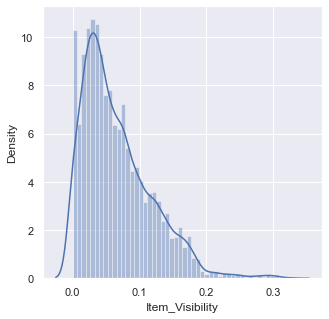

In [1037]:
plt.figure(figsize=(5,5))
sns.distplot(train_df['Item_Visibility'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


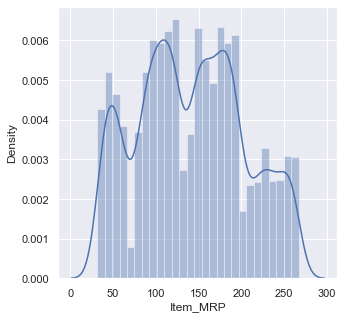

In [1038]:
# distribution plot for Item MRP
plt.figure(figsize=(5,5))
sns.distplot(train_df['Item_MRP'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


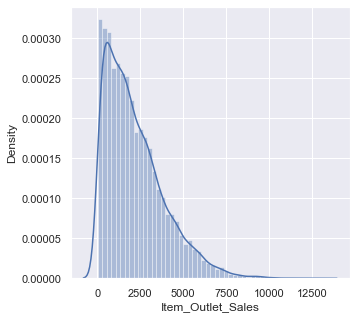

In [1039]:
plt.figure(figsize=(5,5))
sns.distplot(train_df['Item_Outlet_Sales'])
plt.show()

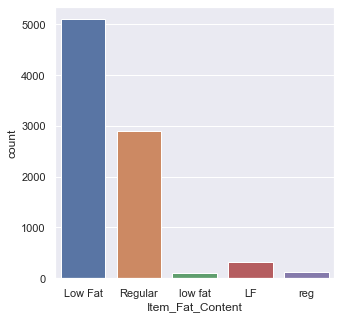

In [1040]:
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content',data=train_df)
plt.show()

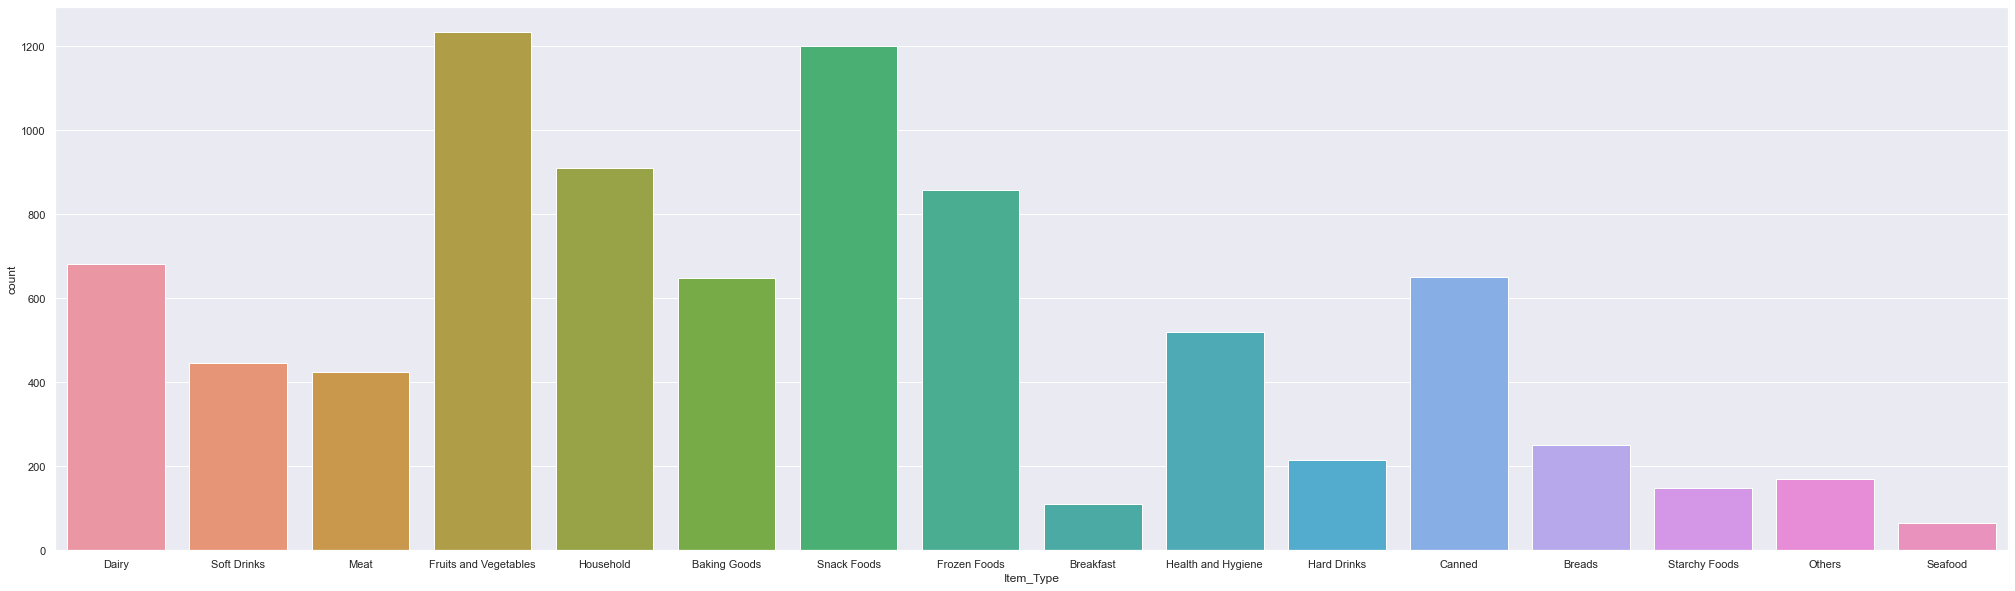

In [1041]:
plt.figure(figsize=(35,10))
sns.countplot(x='Item_Type',data=train_df)
plt.show()

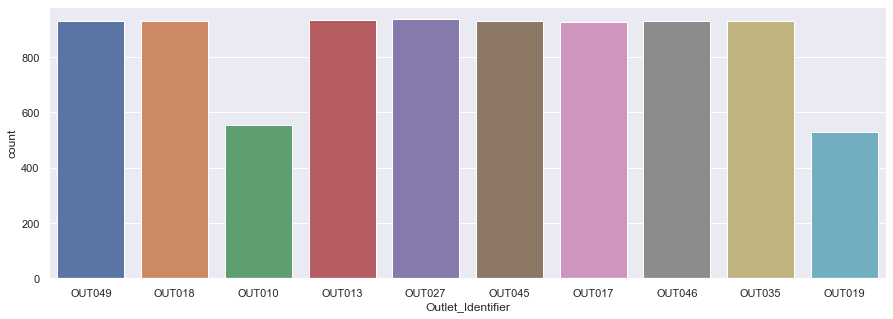

In [1042]:
plt.figure(figsize=(15,5))
sns.countplot(x='Outlet_Identifier',data=train_df)
plt.show()

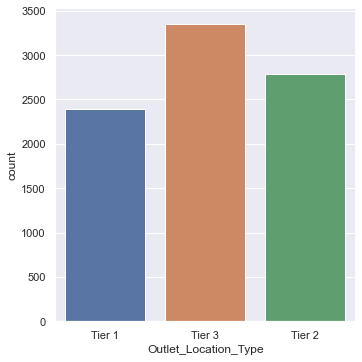

In [1043]:
sns.catplot(x= "Outlet_Location_Type", data= train_df, kind = "count")
plt.show()

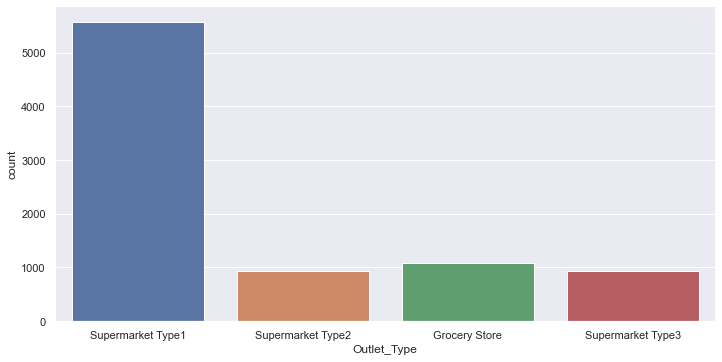

In [1044]:
sns.catplot(x= "Outlet_Type", data= train_df, kind = "count",aspect=2)
plt.show()

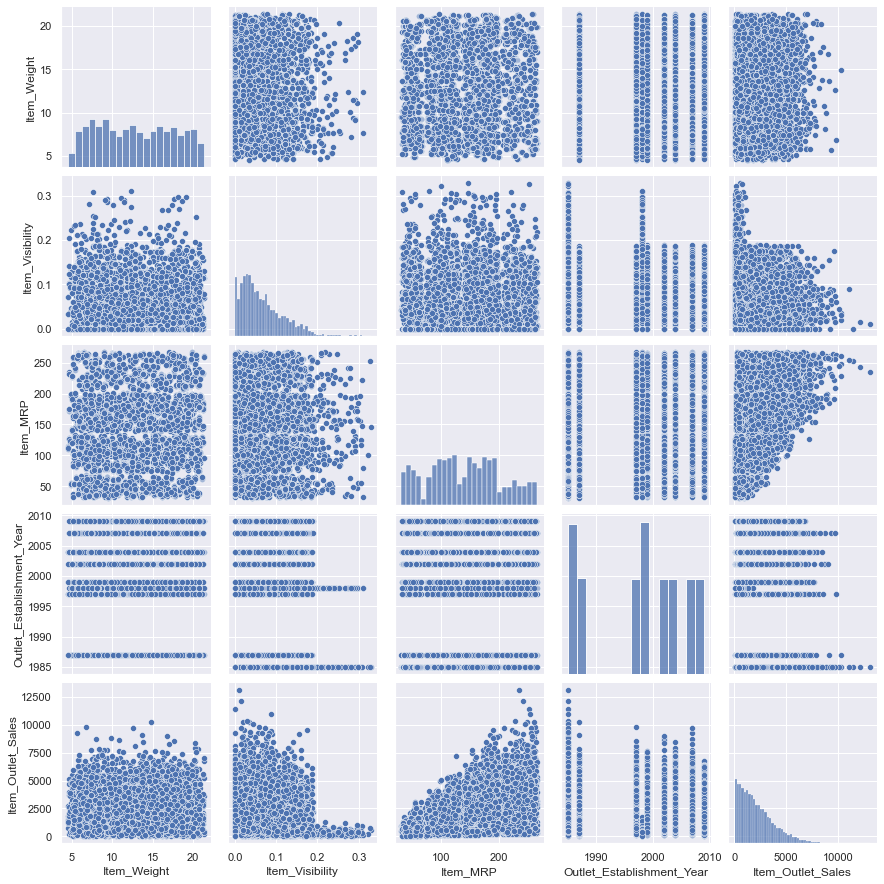

In [1045]:
sns.pairplot(train_df)

In [1046]:
#Handling missing values using mean and mode

df['Item_Weight'].mean()


12.792854228644991

In [1047]:
#filling the missing value with mean value
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [1048]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [1049]:
#replacing the missing value of outlet size 
mode_outlet_size=df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
mode_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [1051]:
missing_values=df['Outlet_Size'].isnull()
missing_values

0        False
1        False
2        False
3         True
4        False
         ...  
14199    False
14200    False
14201     True
14202     True
14203     True
Name: Outlet_Size, Length: 14204, dtype: bool

In [1052]:
df.loc[missing_values,'Outlet_Size']=df.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_outlet_size[x])
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

### Data Analysis

In [1053]:
#statistical measures about the data
sum (df['Item_Visibility']==0)

879

In [1054]:
df.loc[:,'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()],inplace=True)

In [1055]:
sum (df['Item_Visibility']==0)

0

In [1056]:
#combine item fat content
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

### Creating new attributes

In [1057]:
df['New_Item_Type']=df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0        FD
1        DR
2        FD
3        FD
4        NC
         ..
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Name: New_Item_Type, Length: 14204, dtype: object

In [1058]:
df['New_Item_Type']=df['New_Item_Type'].replace({'FD':'Food', 'DR':'Drinks', 'NC': 'Non-consumable'})
df['New_Item_Type'].value_counts()

Food              10201
Non-consumable     2686
Drinks             1317
Name: New_Item_Type, dtype: int64

In [1059]:
df.loc[df['New_Item_Type']=='Non-consumable', 'Item_Fat_Content']='Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [1060]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years'].head()

0    14
1     4
2    14
3    15
4    26
Name: Outlet_Years, dtype: int64

In [1061]:
df =df.drop("Outlet_Establishment_Year", axis=1)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,14
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,train,Food,15
4,NCD19,8.93,Non-Edible,0.065953,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,train,Non-consumable,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1,NaN,test,Food,16
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,Medium,Tier 3,Supermarket Type2,NaN,test,Food,4
14201,NCO17,10.00,Non-Edible,0.073529,Health and Hygiene,118.7440,OUT045,Small,Tier 2,Supermarket Type1,NaN,test,Non-consumable,11
14202,FDJ26,15.30,Regular,0.065953,Canned,214.6218,OUT017,Small,Tier 2,Supermarket Type1,NaN,test,Food,6


In [1062]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [1063]:
df.skew()

Item_Weight          0.111314
Item_Visibility      1.320683
Item_MRP             0.130728
Item_Outlet_Sales    1.177531
Outlet_Years         0.396465
dtype: float64

### Numerical features

### Correlation matrix

<AxesSubplot:>

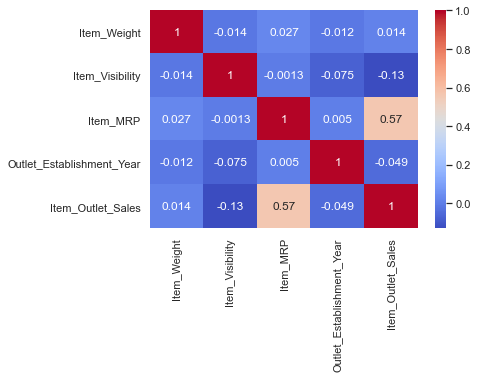

In [1064]:
corr=train_df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

### Label Encoding

In [1065]:
# df = train_df.drop(["Item_Identifier","Outlet_Identifier"], axis=1)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,14
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,train,Food,15
4,NCD19,8.93,Non-Edible,0.065953,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,train,Non-consumable,26


### Onehot Encoding

In [1066]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
# col_name = ["Item_Type"]
# for col in col_name:
#     train_df[col] = le.fit_transform(train_df[col])
df['Outlet']=le.fit_transform(df['Outlet_Identifier'])
# var=['Item_Fat_Content','Outlet_Size','New_Item_Type','Outlet_Location_Type','Outlet_Type','Outlet']
# for i in var:
#     df[i]=le.fit_transform(df[i])

In [1073]:
# df_ts['Item_Identifier']=lencoder.fit_transform(df_ts['Item_Identifier'])
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=le.fit_transform(df['Item_Type'])
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])
df['New_Item_Type']=le.fit_transform(df['New_Item_Type'])
df['Outlet']=le.fit_transform(df['Outlet_Identifier'])

In [1074]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,New_Item_Type,Outlet_Years,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1,0,1,3735.1380,train,1,14,9
1,DRC01,5.92,2,0.019278,14,48.2692,OUT018,1,2,2,443.4228,train,0,4,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1,0,1,2097.2700,train,1,14,9
3,FDX07,19.20,2,0.065953,6,182.0950,OUT010,2,2,0,732.3800,train,1,15,0
4,NCD19,8.93,1,0.065953,9,53.8614,OUT013,0,2,1,994.7052,train,2,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,2,0.013496,13,141.3154,OUT046,2,0,1,NaN,test,1,16,8
14200,FDD47,7.60,2,0.142991,15,169.1448,OUT018,1,2,2,NaN,test,1,4,3
14201,NCO17,10.00,1,0.073529,8,118.7440,OUT045,2,1,1,NaN,test,2,11,7
14202,FDJ26,15.30,2,0.065953,3,214.6218,OUT017,2,1,1,NaN,test,1,6,2


In [1075]:
df=pd.get_dummies(df,columns=['Item_Fat_Content', 'Outlet_Location_Type','Outlet_Size','Outlet_Type','New_Item_Type','Outlet'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Outlet_Years,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,4,249.8092,OUT049,3735.1380,train,14,1,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,14,48.2692,OUT018,443.4228,train,4,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,2097.2700,train,14,1,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.065953,6,182.0950,OUT010,732.3800,train,15,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.065953,9,53.8614,OUT013,994.7052,train,26,0,...,0,1,0,0,0,0,0,0,0,0


# ` Model Building

In [1076]:
df.drop(['Item_Type'], axis=1,inplace=True)

In [1077]:
train=df.loc[df['source']=='train']
test=df.loc[df['source']=='test']

In [1078]:
train.drop(['source'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1079]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

In [1080]:
x_train=train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_train=train['Item_Outlet_Sales']
x_test=test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

### Linear Regression

In [1081]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [1082]:
lr_pred=lr.predict(x_test)
lr_pred

array([1843., 1579., 1873., ..., 1826., 3545., 1277.])

In [1083]:
lr_acc=round(lr.score(x_train,y_train)*100)
lr_acc

56

### Decision Tree Regressor

In [1084]:
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
dtr.fit(x_train,y_train)
dtr_pred=dtr.predict(x_test)

In [1085]:
dtr_acc=round(dtr.score(x_train,y_train)*100)
dtr_acc

61

### Random Forest Regressor

In [1086]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=100,n_jobs=4)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

In [1087]:
rf_acc=round(rf.score(x_train,y_train)*100)
rf_acc

61

### XGBosst Regressor

In [1088]:
# Ada Boost Regressor
from sklearn.ensemble import AdaBoostRegressor
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)

AdaBoostRegressor()

In [1089]:
ABR_pred=ABR.predict(x_test)

In [1091]:
ABR_acc=round(ABR.score(x_train,y_train)*100)
ABR_acc

54

In [1092]:
!pip install xgboost

In [1093]:
import xgboost
print(xgboost.__version__)

1.5.2


In [1094]:
#XGBRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [1095]:
xgb_pred=xgb.predict(x_test)
xgb_acc=round(xgb.score(x_train,y_train)*100)
xgb_acc

99

In [1096]:
# KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train,y_train)
print("KNR score:",knr.score(x_train,y_train))

KNR score: 0.7928137033647318


In [1114]:
param_tuning = {'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']}

In [1119]:
# xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

xgb_model = XGBRegressor()

In [1115]:

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# from sklearn.preprocessing import Imputer


gsearch = GridSearchCV(estimator = xgb_model, param_grid=param_tuning,                                               
                            #scoring = 'neg_mean_absolute_error', #MAE
                            #scoring = 'neg_mean_squared_error',  #MSE
                            cv = 5,n_jobs = -1,verbose = 1)
gsearch.fit(x_train,y_train)

In [ ]:
gsearch.best_estimator_

In [ ]:
y_pred_xgb = xgb_model.predict(x_test)

In [1122]:
import joblib
joblib.dump(xgb_model,'BigMartSale.pkl')

['BigMartSale.pkl']